# WeatherPy
---
This notebook contains a Python script to analyze and visualize weather data of 500+ cities picked randomly from across the world, of varying distance from the equator. It utilizes simple Python libraries along with the [OpenWeatherMap API](https://openweathermap.org/api) to create a representative model of weather across world cities. We primarily explore relationships between a city's Latitude vs the current day's Maximum Temperature, Cloud Coverage, Humidity and Wind Speed.

## Dependencies and Setup
----

In [41]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import date
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List
* Uses the [citypy](https://pypi.org/project/citipy/) library to look for nearest city given a set of geo-coordinates
* Pulls a random list of 500+ (non-repeated) cities

In [42]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print number of cities pulled from citipy
print (f"Pulled a random list of {len(cities)} cities from across the world.")
print ("Now proceeding to retrieve weather data for each city...refer to the next cell for the print log.")

Pulled a random list of 598 cities from across the world.
Now proceeding to retrieve weather data for each city...refer to the next cell for the print log.


## Perform API Calls
* Retrieves weather data for each city using a series of successive [OpenWeatherMap API](https://openweathermap.org/api) calls.
* Includes a print log of each city as it's being processed (with the city number and city name).


In [43]:
# Build the OpenWeatherMap API URL
weather_api_url = "http://api.openweathermap.org/data/2.5/weather?"

# Build partial query URL to get current weather data in Fahrenheit
units = "imperial"
weather_query_url = f"{weather_api_url}appid={weather_api_key}&units={units}&q="

# Set up lists to hold all the city weather data that we want to retrieve
city_names = []
countries = []
temperature_timestamps = []
cloudiness = []
humidity = []
latitudes = []
longitudes = []
max_temperatures = []
wind_speeds = []

# Start of print log as we begin data retrieval using the API
print("Beginning Weather Data Retrieval...")
print(f"-" * 90)

# Perform a weather check on each of the cities using a series of successive API calls
for city_number, city in enumerate(cities, start=1):

    # Call the Weather API for each city in the cities list and save the JSON response data
    city_weather_query = weather_query_url + city
    weather_response = requests.get(city_weather_query).json()

    # Try to grab all of the City weather data if available
    try:
        # Get the City Name
        city_names.append(weather_response['name'])
        # Get the Country Code
        countries.append(weather_response['sys']['country'])
        # Get the Time of data calculation 
        temperature_timestamps.append(weather_response['dt'])
        # Get the % of Cloudiness
        cloudiness.append(weather_response['clouds']['all'])
        # Get the % Of Humidity
        humidity.append(weather_response['main']['humidity'])
        # Get the Latitude and Longitude coordinates
        latitudes.append(weather_response['coord']['lat'])
        longitudes.append(weather_response['coord']['lon'])
        # Get the current temperature
        max_temperatures.append(weather_response['main']['temp_max'])
        # Get the Wind Speed in mph
        wind_speeds.append(weather_response['wind']['speed'])
        
        # Print a log of each city as it's being processed with the city number and city name
        print(f"City {city_number} | Processed data for {city}")

    # Handle exceptions for a city that is not available in the Open Weather API or any other API errors
    except:
        print(f"City {city_number} | Did not find any data for {city}, skipping to the next one...")
        pass

    # Pause for a half second before making the next API call since the Free version of Weather API only permits 60 calls per minute 
    time.sleep(0.5)

# Print the final log indicating that data retrieval has been completed
print("-" * 90)
print(f"Completed Weather Data Retrieval for {len(city_names)} out of {city_number} Cities")      
print("-" * 90)

 | Processed data for klaksvik
City 124 | Processed data for pangnirtung
City 125 | Processed data for puerto ayora
City 126 | Processed data for vagay
City 127 | Processed data for linares
City 128 | Processed data for narsaq
City 129 | Processed data for talnakh
City 130 | Processed data for omboue
City 131 | Processed data for kalmunai
City 132 | Processed data for cape town
City 133 | Processed data for pyaozerskiy
City 134 | Processed data for raudeberg
City 135 | Processed data for ribeira grande
City 136 | Processed data for lebu
City 137 | Processed data for champerico
City 138 | Processed data for prabumulih
City 139 | Processed data for wschowa
City 140 | Processed data for cosenza
City 141 | Processed data for shimoda
City 142 | Processed data for eldorado
City 143 | Did not find any data for illoqqortoormiut, skipping to the next one...
City 144 | Processed data for rosarito
City 145 | Processed data for hualmay
City 146 | Processed data for chokurdakh
City 147 | Processed 

## Convert Raw Weather Data to DataFrame & Export to CSV
* Save all of the city weather data into a Pandas DataFrame.
* Display the DataFrame.
* Export DataFrame to a csv file.

In [44]:
# Save the retrieved weather data into a Data Frame
weather_data_df = pd.DataFrame( {'City': city_names, 'Country': countries, 'Date': temperature_timestamps, 'Latitude': latitudes, 'Longitude': longitudes, 'Max Temperature': max_temperatures, 'Cloudiness': cloudiness, 'Humidity': humidity, 'Wind Speed': wind_speeds } )

# Display the weather data frame
weather_data_df

# Export the city weather data into a csv file
weather_data_df.to_csv('../output_data/cities.csv', index_label='City #')

## Plotting the Weather Data
* Builds a series of scatter plots to showcase the following relationships:
  * Temperature (F) vs. Latitude
  * Humidity (%) vs. Latitude
  * Cloudiness (%) vs. Latitude
  * Wind Speed (mph) vs. Latitude 
* All plotted figures are saved as .png files in the `../images` folder.

### Latitude vs. Temperature Plot

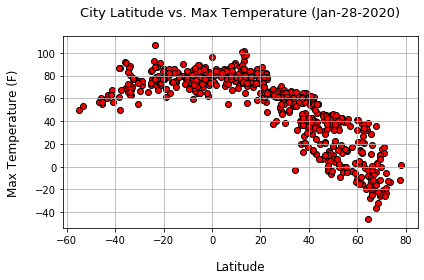

In [45]:
# Draw a scatter plot to showcase the relationship between Temperature (F) vs. Latitude

# Get the current local date so we can print it on the scatter plots
today = date.today()
curr_date = today.strftime('%b-%d-%Y')

# Plot the scatter including the proper axes labels, title and date of analysis
temp_lat_fig, temp_lat_ax = plt.subplots()
temp_lat_ax.scatter(latitudes, max_temperatures, facecolors='red', edgecolors='black')
temp_lat_ax.set_title(f'City Latitude vs. Max Temperature ({curr_date})', fontsize=13, pad=20)
temp_lat_ax.set_xlabel('Latitude', fontsize=12, labelpad=15)
temp_lat_ax.set_ylabel('Max Temperature (F)', fontsize=12, labelpad=15)
temp_lat_ax.grid(True)
temp_lat_fig.tight_layout()
# Save the plotted figure as a png file
plt.savefig("../images/latitude_maxtemp.png", dpi=200)
plt.show()

#### Analysis
It is evident from the plot above that there is a strong correlation between a city's latitude and the temperature on a given day. As you go higher up in latitude (i.e. cities that fall within the upper part of the Northern Hemisphere), temperature tends to dip steadily. Hence, those cities will tend to experience colder weather as opposed to cities near to or South of the equator (< 0 Deg Latitude), which are comparitively much hotter at this time of the year.

### Latitude vs. Humidity Plot

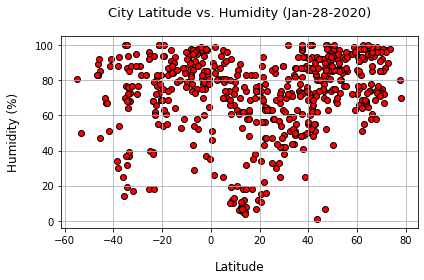

In [46]:
# Draw a scatter plot to showcase the relationship between Humidity (%) vs. Latitude

# Plot the scatter including the proper axes labels, title and date of analysis
hum_lat_fig, hum_lat_ax = plt.subplots()
hum_lat_ax.scatter(latitudes, humidity, facecolors='red', edgecolors='black')
hum_lat_ax.set_title(f'City Latitude vs. Humidity ({curr_date})', fontsize=13, pad=20)
hum_lat_ax.set_xlabel('Latitude', fontsize=12, labelpad=15)
hum_lat_ax.set_ylabel('Humidity (%)', fontsize=12, labelpad=15)
hum_lat_ax.grid(True)
hum_lat_fig.tight_layout()
# Save the plotted figure as a png file
plt.savefig("../images/latitude_humidity.png", dpi=200)
plt.show()

#### Analysis
We can conclude from the plot below that there may be a small correlation between a city's latitude and how humid it is on a given day. While humidity values are scattered fairly consistently across all range of latitudes, there are small clusters of cities both in the Northern as well as Southern Hemispheres (i.e. between 40 and 60 Deg and between 0 and -20 Deg) that appear to experience some of the highest humidity (80-100%).

### Latitude vs. Cloudiness Plot

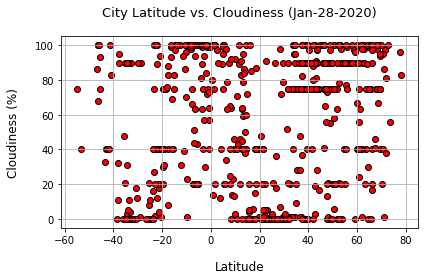

In [47]:
# Draw a scatter plot to showcase the relationship between Cloudiness (%) vs. Latitude

# Plot the scatter including the proper axes labels, title and date of analysis
cloud_lat_fig, cloud_lat_ax = plt.subplots()
cloud_lat_ax.scatter(latitudes, cloudiness, facecolors='red', edgecolors='black')
cloud_lat_ax.set_title(f'City Latitude vs. Cloudiness ({curr_date})', fontsize=13, pad=20)
cloud_lat_ax.set_xlabel('Latitude', fontsize=12, labelpad=15)
cloud_lat_ax.set_ylabel('Cloudiness (%)', fontsize=12, labelpad=15)
cloud_lat_ax.grid(True)
cloud_lat_fig.tight_layout()
# Save the plotted figure as a png file
plt.savefig("../images/latitude_cloudiness.png", dpi=200)
plt.show()

#### Analysis
We can conclude from the plot above that there is very little correlation between a city's latitude and the amount of cloud coverage. Cloudiness varies across all range of latitudes, although as we approach the equator from the South (between -20 and 0 Deg Latitude), we do see a small band of cities with almost 100% cloud cover. Similarly, as we start going North (between 40 and 70 Deg Latitude), there are multiple cities with over 80% cloud cover. On the other hand, we also see cities in the lower part of the Northern Hemisphere (between 10 and 40 Deg Latitude) to have almost no cloud over at all. 

### Latitude vs. Wind Speed Plot

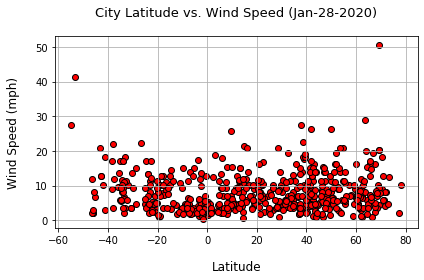

In [48]:
# Draw a scatter plot to showcase the relationship between Wind Speed (mph) vs. Latitude

# Plot the scatter including the proper axes labels, title and date of analysis
windspeed_lat_fig, windspeed_lat_ax = plt.subplots()
windspeed_lat_ax.scatter(latitudes, wind_speeds, facecolors='red', edgecolors='black')
windspeed_lat_ax.set_title(f'City Latitude vs. Wind Speed ({curr_date})', fontsize=13, pad=20)
windspeed_lat_ax.set_xlabel('Latitude', fontsize=12, labelpad=15)
windspeed_lat_ax.set_ylabel('Wind Speed (mph)', fontsize=12, labelpad=15)
windspeed_lat_ax.grid(True)
windspeed_lat_fig.tight_layout()
# Save the plotted figure as a png file
plt.savefig("../images/latitude_windspeed.png", dpi=200)
plt.show()

#### Analysis
The plot above depicts that the further we travel away from the equator (both in the Southern and Northern Hemispheres), the more the likelihood that we will come across cities that experience higher wind gusts/speeds. However, due to the presence of some outliers in both hemispheres, we may need to examine a larger dataset of cities to make a definitive conclusion as to whether there is a stronger correlaton between Wind Speeds and Latitude.

## Linear Regression
* Performs a linear regression on each relationship, but this time separating the weather data into Northern Hemisphere cities (greater than or equal to 0 degrees latitude) and Southern Hemisphere cities (less than 0 degrees latitude).
* The function `create_linregress_plot` creates plots based on the different weather data parameters.
* All plotted figures are saved as .png files in the `../images` folder.

In [49]:
# Function to create and run Linear Regression plots on different weather data relationships

def create_linregress_plot(x_data, y_data, plot_title, plot_xlabel, plot_ylabel):
    # Calculate the correlation coefficient
    correlation_coefficient = st.pearsonr(x_data, y_data)

    # Store  to respective Series' to compute the linear regression model
    x_series = pd.Series(x_data) 
    y_series = pd.Series(y_data)

    # Calculate the linear regression model
    # The stats.lingress function returns the slope, intercept, r-value, p-value and stderr 
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_series, y_series)
    print (f"The r-squared is: {rvalue}")

    # Compute and store the regression values
    regress_values = x_series * slope + intercept

    # Capture the linear regression line equation in the form: y = mx + c
    line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print (f"The line equation is: {line_equation}")

    # Draw the properly formatted scatter plot with title and x-y labels
    scat_fig, scat_ax = plt.subplots()
    scat_ax.scatter(x_series, y_series, facecolors='red', edgecolors='black')
    scat_ax.set_title(plot_title, fontsize=12, pad=20)
    scat_ax.set_xlabel(plot_xlabel, fontsize=12, labelpad=15)
    scat_ax.set_ylabel(plot_ylabel, fontsize=12, labelpad=15)
    # Plot the linear regression line
    scat_ax.plot(x_series, regress_values, 'r-', color='blue', alpha=0.7)
    xticks = scat_ax.get_xticks()
    yticks = scat_ax.get_yticks()
    # Place the line equation as text box on the axes 
    scat_ax.text(xticks[1] + 2, yticks[1] + 2, line_equation, verticalalignment='center', horizontalalignment='left', bbox={'facecolor': 'green', 'alpha': 0.5})
    scat_ax.grid(True)
    scat_fig.tight_layout()
    return (plt)

In [50]:
# Create Northern and Southern Hemisphere DataFrames and respective weather data lists

# Northern Hemisphere DataFrame (greater than or equal to 0 degrees latitude)
northern_hemisphere_data = weather_data_df[weather_data_df['Latitude'] >= 0]
# Retrieve the weather data lists from the Northern Hemisphere DataFrame
nh_latitudes = northern_hemisphere_data['Latitude'].tolist()
nh_max_temps = northern_hemisphere_data['Max Temperature'].tolist()
nh_humidity = northern_hemisphere_data['Humidity'].tolist()
nh_cloudiness = northern_hemisphere_data['Cloudiness'].tolist()
nh_windspeeds = northern_hemisphere_data['Wind Speed'].tolist()

# Southern Hemisphere DataFrame (less than 0 degrees latitude)
southern_hemisphere_data = weather_data_df[weather_data_df['Latitude'] < 0]
# Retrieve the weather data lists from the Southern Hemisphere DataFrame
sh_latitudes = southern_hemisphere_data['Latitude'].tolist()
sh_max_temps = southern_hemisphere_data['Max Temperature'].tolist()
sh_humidity = southern_hemisphere_data['Humidity'].tolist()
sh_cloudiness = southern_hemisphere_data['Cloudiness'].tolist()
sh_windspeeds = southern_hemisphere_data['Wind Speed'].tolist()

###  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8822064109782751
The line equation is: y = -1.43x + 97.0


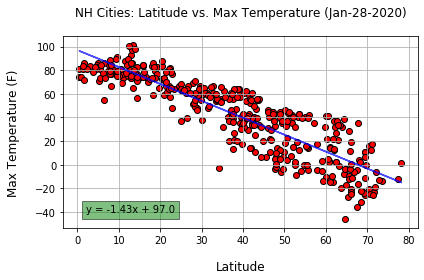

In [51]:
# Set the plot title and axes labels
plot_title = f'NH Cities: Latitude vs. Max Temperature ({curr_date})'
plot_xlabel = 'Latitude'
plot_ylabel = 'Max Temperature (F)'

# Call function to calculate and create a linear regression plot
plt = create_linregress_plot(nh_latitudes, nh_max_temps, plot_title, plot_xlabel, plot_ylabel)
plt.savefig("../images/nh_latitude_maxtemp.png", dpi=200)
plt.show()

###  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.44962784013046875
The line equation is: y = 0.32x + 81.45


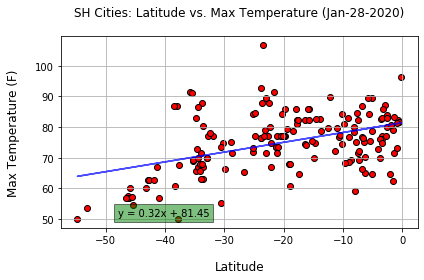

In [52]:
# Set the plot title and axes labels
plot_title = f'SH Cities: Latitude vs. Max Temperature ({curr_date})'
plot_xlabel = 'Latitude'
plot_ylabel = 'Max Temperature (F)'

# Call function to calculate and create a linear regression plot
plt = create_linregress_plot(sh_latitudes, sh_max_temps, plot_title, plot_xlabel, plot_ylabel)
plt.savefig("../images/sh_latitude_maxtemp.png", dpi=200)
plt.show()

### Latitude vs Temperature - Linear Regression Analysis 
As expected, the Northern and Southern Hemisphere plots above clearly depict a pretty strong correlation between a city's latitude and the temperature on a given day. As you start going up North (away from the equator), weather turns significantly colder. Similarly, the further you travel South of the equator, the hotter it gets. Interestily, there appear to be a few outlier cities that are away from te equator (between -35 and 20 Deg Latitude), which appear to be experiencing very hot weather (> 90F).

###  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.45625719557075634
The line equation is: y = 0.54x + 50.03


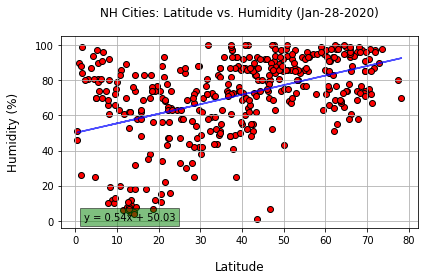

In [53]:
# Set the plot title and axes labels
plot_title = f'NH Cities: Latitude vs. Humidity ({curr_date})'
plot_xlabel = 'Latitude'
plot_ylabel = 'Humidity (%)'

# Call function to calculate and create a linear regression plot
plt = create_linregress_plot(nh_latitudes, nh_humidity, plot_title, plot_xlabel, plot_ylabel)
plt.savefig("../images/nh_latitude_humidity.png", dpi=200)
plt.show()

###  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.2273232564438513
The line equation is: y = 0.34x + 81.3


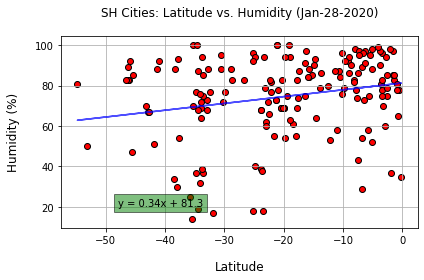

In [54]:
# Set the plot title and axes labels
plot_title = f'SH Cities: Latitude vs. Humidity ({curr_date})'
plot_xlabel = 'Latitude'
plot_ylabel = 'Humidity (%)'

# Call function to calculate and create a linear regression plot
plt = create_linregress_plot(sh_latitudes, sh_humidity, plot_title, plot_xlabel, plot_ylabel)
plt.savefig("../images/sh_latitude_humidity.png", dpi=200)
plt.show()

### Latitude vs Humidity - Linear Regression Analysis 
The Northern Hemisphere data suggests more concentration of humid cities as you go higher up North, whereas in the Southern Hemisphere, humid cities are concentrated more as you go closer to the equator. However, a larger dataset of cities may need to be analyzed and examined, to determine if there is a stronger correlation between a city's latitude and it's humidity. 

###  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.2641351223864242
The line equation is: y = 0.5x + 36.24


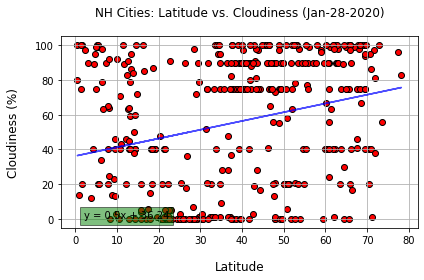

In [55]:
# Set the plot title and axes labels
plot_title = f'NH Cities: Latitude vs. Cloudiness ({curr_date})'
plot_xlabel = 'Latitude'
plot_ylabel = 'Cloudiness (%)'

# Call function to calculate and create a linear regression plot
plt = create_linregress_plot(nh_latitudes, nh_cloudiness, plot_title, plot_xlabel, plot_ylabel)
plt.savefig("../images/nh_latitude_cloudiness.png", dpi=200)
plt.show()

###  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.34420504329307045
The line equation is: y = 0.96x + 74.4


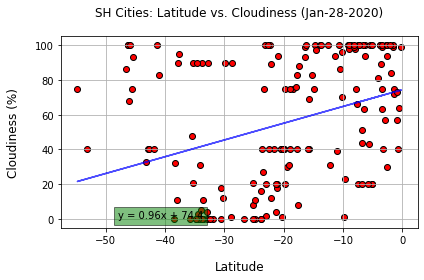

In [56]:
# Set the plot title and axes labels
plot_title = f'SH Cities: Latitude vs. Cloudiness ({curr_date})'
plot_xlabel = 'Latitude'
plot_ylabel = 'Cloudiness (%)'

# Call function to calculate and create a linear regression plot
plt = create_linregress_plot(sh_latitudes, sh_cloudiness, plot_title, plot_xlabel, plot_ylabel)
plt.savefig("../images/sh_latitude_cloudiness.png", dpi=200)
plt.show()

###  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.11889517762186581
The line equation is: y = 0.03x + 6.93


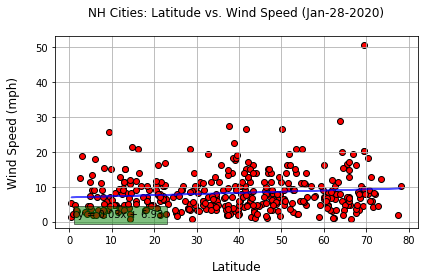

In [57]:
# Set the plot title and axes labels
plot_title = f'NH Cities: Latitude vs. Wind Speed ({curr_date})'
plot_xlabel = 'Latitude'
plot_ylabel = 'Wind Speed (mph)'

# Call function to calculate and create a linear regression plot
plt = create_linregress_plot(nh_latitudes, nh_windspeeds, plot_title, plot_xlabel, plot_ylabel)
plt.savefig("../images/nh_latitude_windspeed.png", dpi=200)
plt.show()

###  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.39949070858662716
The line equation is: y = -0.17x + 4.21


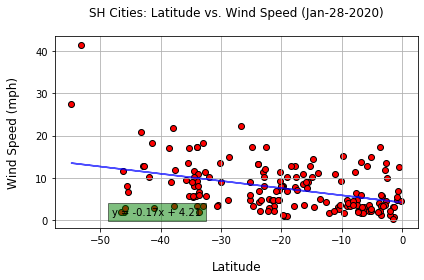

In [58]:
# Set the plot title and axes labels
plot_title = f'SH Cities: Latitude vs. Wind Speed ({curr_date})'
plot_xlabel = 'Latitude'
plot_ylabel = 'Wind Speed (mph)'

# Call function to calculate and create a linear regression plot
plt = create_linregress_plot(sh_latitudes, sh_windspeeds, plot_title, plot_xlabel, plot_ylabel)
plt.savefig("../images/sh_latitude_windspeed.png", dpi=200)
plt.show()